# MATH 4650 Homework 1 - Mathieu Foucher


In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import sympy as sym
from sympy import init_printing
init_printing()


## Problem 1 - Part a)

Part i: Naive Evaluation of the polynomial using: 

```
np.poly1d()
```



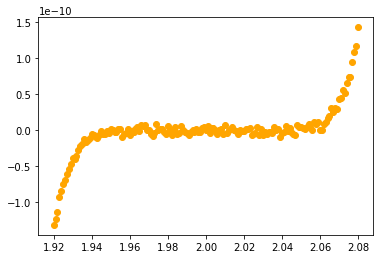

In [ ]:
# Part i:

# Polynomial Naive Evaluation:

p_1 = np.poly1d([2,2,2,2,2,2,2,2,2], True)

x_1 = np.arange(1.92, 2.08, 0.001)

# Putting the values from naive evaluation into the list x_1:
y_1 = list()

for i in np.arange(1.92, 2.08, 0.001):
  y_1.append(p_1(i))

plot1 = plt.scatter(x_1, y_1, color = "orange" )

Part ii: Using the compact form $p(x) = (x-2)^{9}$:

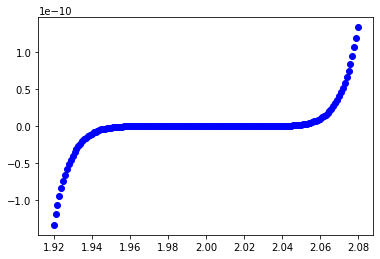

In [ ]:
# Part ii:

# Using the compact form:

def p(x):
    return (x - 2)**9

# Plotting the polynomial with 100 equispaced points:

x_2 = np.arange(1.92, 2.08, 0.001)

plot2 = plt.scatter(x_2, p(x_2), color = "blue")



Part iii: Implementation of Horner's Rule:

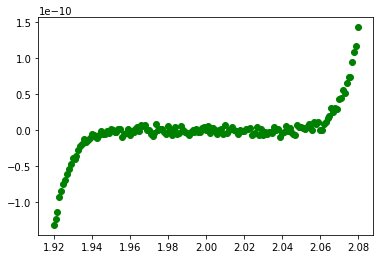

In [ ]:
# Part iii:
x_3 = np.arange(1.92, 2.08, 0.001)

# Implement Horner's Rule:

# Range for plotting Horner's rule algorithm data:

arr = p_1.c

# Definition of Horner's Rule as a function:
def hornersRule(A,x):
  val = A[0]
  i = 1
  while len(A) > i:
    val = val * x + A[i]
    i +=1
  return val

plot3 = plt.scatter(x_3, hornersRule(arr, x_3), color = "green")


Part iv: Using the python function


```
np.polyval()
```



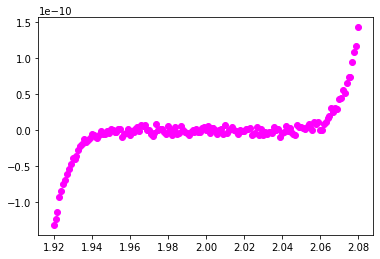

In [ ]:
# Part iv:

# Using software library:

y_3 = list()
x_4 = np.arange(1.92, 2.08, 0.001)

plot4 = plt.scatter(x_4, np.polyval(arr, x_4), color = "magenta")

Text(0.5, 1.0, 'Scatter Plot of 4 Algorithms.')

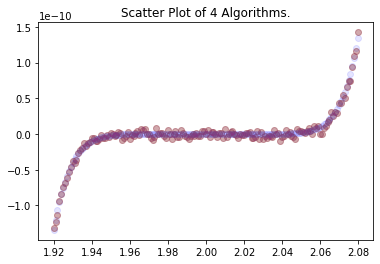

In [ ]:
# Output of Problem 1:

plot1 = plt.scatter(x_1, y_1, color = "red", alpha = 0.2 )
plot2 = plt.scatter(x_2, p(x_2), color = "blue", alpha = 0.1)
plot3 = plt.scatter(x_3, hornersRule(arr, x_3), color = "green", alpha = 0.2)
plot4 = plt.scatter(x_4, np.polyval(arr, x_4), color = "magenta", alpha = 0.1)
plt.title("Scatter Plot of 4 Algorithms.")



# Problem 1 - Part b)

In plotting the 4 different algorithms' results we can clearly tell that the most precise is the compact form that is $p(x) = (x-2)^{9}$. The three other algorithms appear to have the same precision, although we know from lecture that Horner's rule is the most efficient in flops. Sources of numerical error for the other algorithms are most definitely due to the number of flops, especially in the case of naive plotting of the values of $p(x)$.


## Problem 2 - Loss of Significance


### Part a) 
_Rewrite $f(x) = \sqrt{x+1} - 1$ to avoid cancellation when $x\approx 0$._

$\underline{Solution:}$ We may rewrite $f(x)$ by multiplying by the conjugate divided by the conjugate in the following manner:

$f(x) = \sqrt{x+1} - 1 = \sqrt{x+1} - 1 \cdot \tfrac{\sqrt{x+1} + 1}{\sqrt{x+1} + 1} = \frac{(\sqrt{x+1} - 1)(\sqrt{x+1} + 1)}{\sqrt{x+1} + 1} = \frac{x}{\sqrt{x+1} + 1}$

We can now see that cancellation is now avoided as the quantity $\sqrt(x+1) - 1$ is no longer present.

### Part b)
_Rewrite $f(x) = sin(2(x + a) - sin(2a)$ to avoid cancellation where $x\approx a$._

$\underline{Solution}$ Using the trig identity $sin(2x) = 2cos(x)sin(x)$, we may obtain the formula:

$sin(2(x + a)) - sin(2a) = 2cos(x + a)sin(x + a) - 2cos(a)sin(a) = 2cos(x+2a)sin(x)$ 

Here cancellation is avoided, since we have prevented the subtraction of $x$ and $a$ altogether.

## Problem 3 - The Sequence Problem

### Part a) 

Suppose a sequence $x_n$ has the form:

$(x_n) = C\cdot n^{-\alpha}$

for constants $C, \alpha$. What kind of scaling on the axes would be required for the terms of the sequence to form a straight line?

$\underline{Solution:}$ Algebraically, we may think of $x_n$ as the $y$ axis and $n$ as the $x$ axis. We may then rearrange the sequence written in the following form:

$y = C\cdot x^{-\alpha}$

The answer to our question is that both the output axis and the input axis will have to be on a logarithmic scale, giving us what is known as a "log-log" graph. This is because the terms of the sequence are determined by a monomial expression.

We may rewrite the expression using the natural logarithm:

$ln(y) = ln(C\cdot x^{-\alpha}) \to ln(y) = (-\alpha)ln(x) + ln(C)$

Squinting our eyes a bit, this new equation looks a lot like $y=mx + b$, which we may recognize as the equation for straight lines the plane. Below we will see an example of a log-log plot and a plot of the sequence for some arbitrary choices of $(C, \alpha)$ in the plane with no axis scaling:

Text(0.5, 1.0, 'Sequence x_n evaluated in the plane')

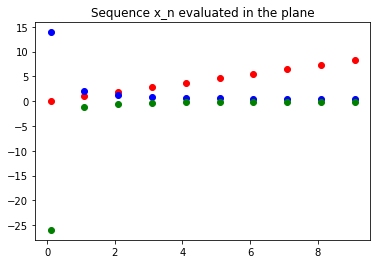

In [ ]:
# Definition of the sequence:

def seq1(C, a, n):
  return C * n**(- a)

axis = np.arange(0.1,10.1,1)

# Arbitrary selections of the given sequence:
p1 = plt.scatter(axis, seq1(0.9, -1, axis), color = "red")
p2 = plt.scatter(axis, seq1(2.2, 0.8, axis), color = "blue")
p3 = plt.scatter(axis, seq1(-1.3,1.3, axis), color = "green")
plt.title("Sequence x_n evaluated in the plane")


Text(0.5, 1.0, 'Sequence x_n on log-log plot')

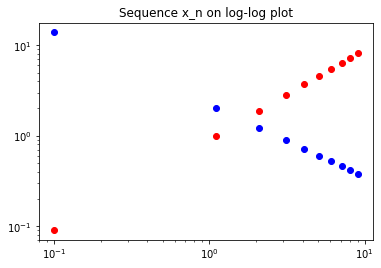

In [ ]:
# The log-log plot:

p1 = plt.scatter(axis, seq1(0.9, -1, axis), color = "red")
p2 = plt.scatter(axis, seq1(2.2, 0.8, axis), color = "blue")
p3 = plt.scatter(axis, seq1(-1.3,1.3, axis), color = "green")

plt.yscale('log')
plt.xscale('log')
plt.title("Sequence x_n on log-log plot")

The data looks kind of messed up, and I apologize. If you take a ruler to any two points of the same color, however, the ruler will have the rest of the points of the same color along it's edge (my definition of straightness).

### Part b)

Repeat part a), but for the sequence:

$x_n = D\cdot \rho^{n}$

where $D, \rho$ are constants and $\rho < 1$.

$\underline{Solution:}$ Similarly to part a), we can algebraically rearrange the sequence to find the inverse, which is accomplished in the following steps:

$y = D\cdot \rho^{n} \longrightarrow \frac{y}{D} = \rho^{n} \longrightarrow log(\frac{y}{D}) = n\cdot log(\rho) \longrightarrow log(\frac{y}{D} - \rho) = n$.

thus we can see that we must apply a scaling to the axis of outputs logarithmically, and only this axis since our sequence is expressed by an exponential:

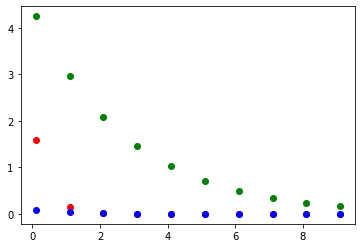

In [ ]:
# Definition of part b) sequence:

def seq2(D, r, n):
  assert r < 1.0
  return D*r**(n)

inputAxis = np.arange(0.1, 10.1, 1)

# Different choices for D and r based on constraints:
plotb1 = plt.scatter(inputAxis, seq2(2.0, 0.1, inputAxis), color = "red")
plotb2 = plt.scatter(inputAxis, seq2(0.1, 0.4, inputAxis), color = "blue")
plotb3 = plt.scatter(inputAxis, seq2(4.4, 0.7, inputAxis), color = "green")

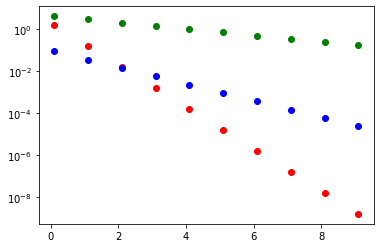

In [ ]:
# Plotting with logarithmic rescaling:
plotb1 = plt.scatter(inputAxis, seq2(2.0, 0.1, inputAxis), color = "red")
plotb2 = plt.scatter(inputAxis, seq2(0.1, 0.4, inputAxis), color = "blue")
plotb3 = plt.scatter(inputAxis, seq2(4.4, 0.7, inputAxis), color = "green")

plt.yscale('log')

### Part c) 

Estimate whether the sequence, from the given terms $5.600, 4.4800, 3.5840, 2.8672, 2.2938, 1.8350, 1.4680, 1.1744, 0.9395, 0.7516$ converges superlinearly, linearly, or quadratically; explain why you think so.

$\underline{Solution:}$ 


In order to make an esimation on the nature of this sequence, lets go ahead and plot these points. We are given the information that these are the first ten terms of the sequence, in general, a sequence is a function from the natural numbers to the real numbers, so thus we will assume $(1, 5.600)$ is a point, $(2, 4.4800)$ is also a point, and so on:

Text(0.5, 1.0, 'Given Points - First Ten Sequence Terms')

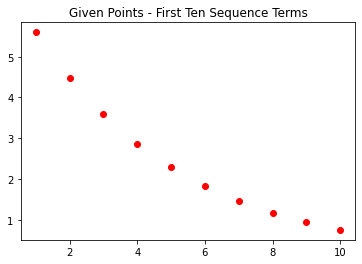

In [ ]:
# Plotting the values of the sequence:

xlist = np.arange(1,11,1)
ylist = [5.600, 4.4800, 3.5840, 2.8672, 2.2938, 1.8350, 1.4680, 1.1744, 0.9395, 0.7516]

numberPlot = plt.scatter(xlist, ylist, color = "red")
plt.title("Given Points - First Ten Sequence Terms")

Now that we have the first ten terms nicely lined up on a plot, we can try to see if the data forms a striaght line with both plots scaled by $ln()$, or with just the output plot. Why? This will tell us quickly if the sequence can be of the form of the sequences from part a) or part b):



Text(0.5, 1.0, 'Ten Terms with log Scaling on BOTH Axes')

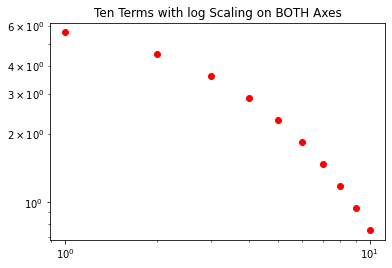

In [ ]:
# Trying Both Axes Scaled Logarithmically:

numberPlot = plt.scatter(xlist, ylist, color = "red")
plt.xscale('log')
plt.yscale('log')
plt.title("Ten Terms with log Scaling on BOTH Axes")

AHA! Gotcha! Looks as though our ten points couldn't possibly be the first sequence, but now if we try the sequence from part b):

Text(0.5, 1.0, 'Ten Terms with log Scaling on OUTPUT Axis')

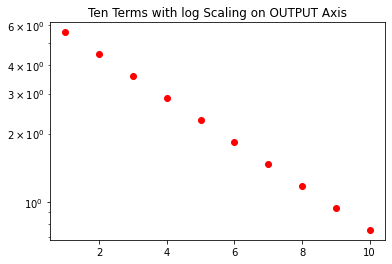

In [ ]:
# Trying Just the y-axis:

numberPlot = plt.scatter(xlist, ylist, color = "red")
plt.yscale('log')
plt.title("Ten Terms with log Scaling on OUTPUT Axis")

Great! It appears that the ten points will most definitely be from a sequence of the form of that in part b). To find the values of $D$ and $\rho$, we can use the fact that $x_n = D\cdot \rho^{n}$ on this semilog plot becomes $log(x_n) = log(D) + x\cdot log(\rho)$ (here the base of log is 10):


In [ ]:
# Find values of D and r:

r0 = 10**((np.log10(4.48) - np.log10(5.6))/(1.0))
print(r0)
D0 = 10**(np.log10(4.48) - 2.0 * np.log10(r0))

# Now we print the sequence to verify:
for i in range(1,11,1):
  print(seq2(D0, r0, i))

print("D =", D0, "r =", r0)

0.7999999999999999
5.6000000000000005
4.48
3.584
2.8671999999999995
2.29376
1.8350079999999995
1.4680063999999995
1.1744051199999996
0.9395240959999995
0.7516192767999995
D = 7.000000000000002 r = 0.7999999999999999


We can see that our results for $D$ and $\rho$ are approximately $7$ and $0.8$ respectively. Given the sequence terms, let us compute the expression $lim_{k\to \infty} |\frac{x_{k+1} - L}{x_{k} - L}|$ to determine the rate of convergence:

$lim_{k\to \infty} |\frac{x_{k+1} - L}{x_{k} - L}| = lim_{k\to \infty} |\frac{7\cdot (0.8)^{k+1}}{7\cdot (0.8)^{k}}| = lim_{k\to \infty} |0.8| = 0.8$

By our given definitions of convergence rates, since $0.8 \in (0,1)$ we have that the sequence converges _linearly_ to zero.

### Part d)

Repeat part c) but for the following sequence: $3.0000, 1.0607, 0.5774, 0.3750, 0.2683, 0.2041, 0.1620, 0.1326, 0.1111, 0.0949$

$\underline{Solution:}$

As in part c), we will plot these points:

Text(0.5, 1.0, 'Part d) Given Sequence')

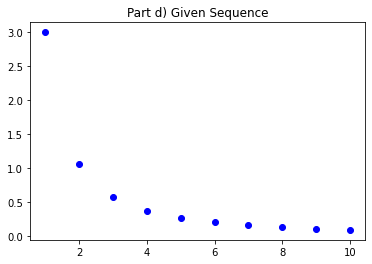

In [ ]:
# Plotting part d) points:

xlist = np.arange(1,11,1)
ylist = [3.0000, 1.0607, 0.5774, 0.3750, 0.2683, 0.2041, 0.1620, 0.1326, 0.1111, 0.0949]

numberPlot2 = plt.scatter(xlist, ylist, color = "blue")
plt.title("Part d) Given Sequence")

Let us again compare plots with log scaling on just the output axis and on both axes:

Text(0.5, 1.0, 'Part d) Given Sequence - Log scaled output')

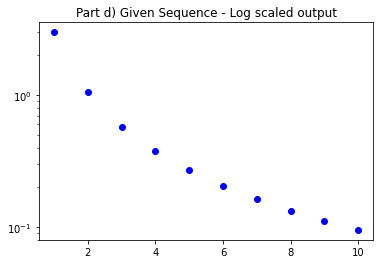

In [ ]:
# Log scaling on just the output axis:

numberPlot2 = plt.scatter(xlist, ylist, color = "blue")
plt.yscale('log')
plt.title("Part d) Given Sequence - Log scaled output")

Text(0.5, 1.0, 'Part d) Given Sequence - log-log')

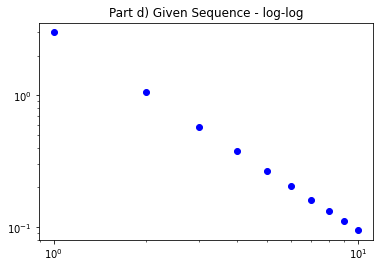

In [ ]:
# Log scaling on both axes:

numberPlot2 = plt.scatter(xlist, ylist, color = "blue")
plt.xscale('log')
plt.yscale('log')
plt.title("Part d) Given Sequence - log-log")

We can now see that the sequence in part d) is of the form of the sequence from part a). So we can again use the log formulas to find the values of $C$ and $\alpha$:

In [ ]:
# Find C and a:

# Using the points (1, 3.0000), (2, 1.0607):

a0 = - (np.log10(1.0607) - np.log10(3.0000))/(np.log10(2.0000) - np.log10(1.0000))

C0 = 10**(np.log10(3.0000) + a0 * np.log10(1.0000))

for i in range(1,11,1):
  print(seq1(3.0, 1.5, i))

print("C =", C0, "a =", a0)

3.0
1.0606601717798214
0.5773502691896257
0.375
0.2683281572999748
0.2041241452319315
0.16198477414681167
0.13258252147247768
0.1111111111111111
0.09486832980505137
C = 3.0 a = 1.4999458272324422


We now have approximate values for $C = 3.0$, and for convenience in the next step, $\alpha = 1.5$. Now, we will use the limit definition $lim_{k\to \infty} |\frac{x_{k+1} - L}{x_{k} - L}|$ to determine the rate of convergence to zero:

$lim_{k\to \infty} |\frac{x_{k+1} - L}{x_{k} - L}| = lim_{k\to \infty} |\frac{3\cdot (x_{k+1})^{-1.5}}{3\cdot (x_{k})^{-1.5}}| = lim_{k \to \infty} |\frac{(x_{k})^{1.5}}{(x_{k+1})^{1.5}}| = lim_{k \to \infty} |\frac{(x_{k})^{1.5}}{(x_{k+1})^{1.5}}| = lim_{k \to \infty} |\frac{(x_{k})}{(x_{k+1})}|^{0.5}$

By the root test of convergence:

$lim_{k \to \infty} |\frac{(x_{k})}{(x_{k+1})}|^{0.5} = 0$

So thus, from our given definitions, we have that this sequence converges _superlinearly_ to zero.

## Problem 4 - Big O Problem

$\underline{Solution:}$ To verify the limit, plugging in $h = 0$ we have:

$\tfrac{lim}{h \rightarrow 0} (\frac{1}{1 - h} - h - 1) = \frac{1}{1-0} - 0 - 1 = 1 - 1 = 0$.

Now, to determine the rate of convergence we may algebraically manipulate:

$\frac{1}{1-h} - h - 1 = \frac{1}{1-h} - \frac{h(1-h)}{(1-h)} - \frac{1-h}{1-h} = \frac{1 - h(1-h) - 1 + h}{1-h} = \frac{1 - h + h^2 -1 + h}{1-h}$
$= \frac{h^2}{1-h}$.

Now, using O notation we can say that:

$lim_{h\to 0} |\frac{h^{2}}{\frac{h^2}{1-h}}| = lim_{h\to 0} |h^{2}\cdot \frac{1-h}{h^2}| = lim_{h\to 0} |1-h| = 1$.

So thus, by definition of what it means for a function to be big O of another function we have that $h^2 = O(\frac{1}{1 - h} - h - 1)$ and $h^2$ is our rate of convergence.

## Problem 5 - Conditioning Problem

Let $f(x) = e^{x} - 1$.

### Part a) 
_What is the relative condition number $\mathcal{K}_{f(x)}$? Are there any values of $x$ for which this is ill - conditioned?_

$\underline{Solution:}$ We will look at the relative error, which is given by:

$\mathcal{K}_{f}(x) = lim_{\epsilon \to 0} | \frac{x}{e^{x} - 1}\cdot e^{x}| = |\frac{x\cdot e^{x}}{e^{x} - 1}|$

Now we can easily see that as $x$ approaches infinity:

$lim_{x\to \infty} |\frac{x\cdot e^{x}}{e^{x} - 1}|\ (l'hopital's rule) = lim_{x\to \infty} |\frac{e^{x} + x\cdot e^{x}}{e^{x}}| = |1+\infty| = \infty$

This is what we expect for a condition number, as we expect a linear relationship between perturbations in the input values with the output values, however as $x\to 0$ we get:

$lim_{x\to 0} |\frac{x\cdot e^{x}}{e^{x} - 1}|\ (l'hopital's rule) = lim_{x\to 0} |\frac{e^{x} + x\cdot e^{x}}{e^{x}}| = |1 + 0| = 1$

Because of the indeterminate form from using $x = 0$, we have that $f$ is ill conditioned at $x=0$.

### Part b)

_Consider Computing $f(x)$ via the following algorithm:\
$1: e^{x} \to y$\
$2: return\ y - 1$\
Is this algorithm stable? Justify your answer._

$\underline{Solution:}$ We check the conditioning of each step:

$\textbf{Step 1:}\ \mathcal{K}_{e^{x}}(x) = |\frac{x}{e^{x}}\cdot e^{x}| = |x|$\
$\textbf{Step 2:}\ \mathcal{K}_{x - 1}(x) = |\frac{x}{x-1}\cdot (1)| = |\frac{1}{1 - \tfrac{1}{x}}|$

Conslusion: The algorithm is stable for values greater than and not around $1$, this is because the last step of the algorithm has a condition number that gets smaller and smaller as $x$ approaches infinity while the condition number for the function itself grows as $x$ approaches infinity. We can see this in the plot below:

Text(0.5, 1.0, 'Plots of Algorithms a) and b)')

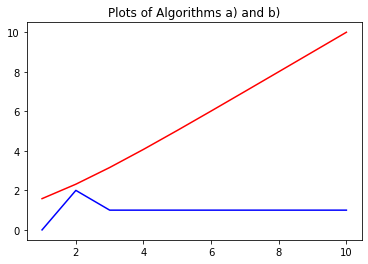

In [ ]:
# Plotting the conditioning of the algorithm vs. conditioning of the function f(x):

x1 = np.arange(1, 11, 1)

def a(x):
  value1 = x*math.exp(x)
  value2 = math.exp(x)
  return abs((value1)/(value2 - 1))

a2 = np.vectorize(a)

def b(x):
  if x != 1:
    return abs(1/(1 - 1/(x)))
  else:
    return 0

b2 = np.vectorize(b)

aplot = plt.plot(x1, a2(x1), color = "red")
bplot = plt.plot(x1, b2(x1), color = "blue")
plt.title("Plots of Algorithms a) and b)")

Because of the vertical asymptote at $x = 1$, we cannot say that the algorithm is entirely stable, as values very close to $x = 1$ will result in huge numbers, even by small perturbations so thus near this value the alorithm is ill -conditioned and so the algorithm cannot be stable entirely.

### Part c)

_Let $x$ have the value $9.999999995000000 \times 10^{-10}$, in which case $x$ is equal to $10^{-9}$ up to 16 decimal places. How many correct digits does the algorithm above give you? is this expected?_

$\underline{Solution:}$ We can plug the value for $x$ into the algorithm implemented in code:

In [ ]:
# Alogrithm b)

def algorithmB(x):
  y = math.exp(x)
  return y - 1

x1 = 9.999999995000000e-10

print(algorithmB(x1), "Error: ", np.log10(b2(x1)))


1.000000082740371e-09 Error:  -8.999999999782853


Knowing that the correct number is $10^{-9}$ up to $16$ decimal places, we have the correct answer up to only eight decimal places. This is expected as the log base 10 of the relative error suggest that we are to lose almost nine digits.

### Part d) 
_Find a polynomial approximation $f(x)$ that is accurate to $16$ digits for all $|x|\leq 10^{-9}$ and prove your answer._


$\underline{Solution:}$ We will use the taylor series of $e^{x} - 1$ centered at $x_0 = 0$ to find an effective polynomial approximation:

In [ ]:
# Taylor series for f(x) = e^x - 1:

def f(x):
  return math.exp(x) - 1
x = sym.Symbol('x')
taylor = sym.series(sym.exp(x) - 1, x, x0 = 0, n=2)
taylor

To find how many terms we will need in the series approximation to get the accuracy to 16 digits for all $|x|\leq 10^{-9}$, we can use Taylor's Remainder Theorem:

$|R_{n}| = |\frac{f^{(n+1)}(c)}{(n+1)!}\cdot (x-a)^{n+1}|$

_Our proof is as follows:_ We want to find an $n$ large enough so that any value in the interval $(-10^{-9}, 10^{-9})$ is accurate to 16 digits when used in the polynomial.\
We begin by first finding the values needed fo the Taylor remainder theorem. Luckily our function is $f(x) = e^{x} - 1$, so any $nth$ derivative of $f$ will simply be $e^{x}$, thus: $f^{(n+1)}(x) = e^{x}$.\
We also know that our series is centered at $x = 0$, which is appropriate for the interval we wish to have our specified accuracy, so $a = 0$.\
Now we will consider the value $c$, which is contained in the interval $(-10^{-9}, 10^{-9})$ and can be any value in this interval.\
Lastly, we have $n$, which is a number we must choose large enough to guarantee the required digits of precision, in short we must choose $n$ so that:

$|\frac{e^{c}}{(n+1)!}\cdot x^{n+1}| \leq 10^{-16}$

We know that $c\in (-10^{-9}, 10^{-9})$, so then $|e^{c}| < e^{10^{-9}} < 1 + 10^{-8}$, additionally we know that $|x^{n+1}| < (10^{-9})^{n+1}$. Now we want to be sure that:

$|\frac{e^{c}}{(n+1)!}\cdot (10^{-9})| \leq 10^{-16}$

So, with the previous inequalities we may write the following:

$|\frac{e^{c}}{(n+1)!}\cdot (10^{-9})^{n+1}|\leq \frac{1 + 10^{-8}}{(n+1)!}\cdot (10^{-9})^{n+1}$

Now, we still need to be sure that:

$\frac{1 + 10^{-8}}{(n+1)!}\cdot (10^{-9})^{n+1} \leq 10^{-16}$

So to do this, we will need to choose a value for $n$, we can try $n = 2$:

$n=2:\ \frac{1 + 10^{-8}}{(3)!}\cdot (10^{-9})^{3} = 1.66\times 10^{-25}$

So thus with a value of $n = 2$ we were able to guarantee that all $x\in (-10^{-9}, 10^{-9})$ are accurate to at least up to 16 digits.

### Part e)
_Evaluate your polynomial approximation at the same value as before. How many digits of precision do you have?_

$\underline{Solution:}$

In [ ]:
# Evaluating the polynomial:

# Original Function:
def f(x):
  return math.exp(x) - 1

# Taylor Approximation:
def t(x):
  return x + x**2

print("Original: ", f(9.999999995000000e-10), "Polynomial: ", t(9.999999995000000e-10))


Original:  1.000000082740371e-09 Polynomial:  1.0000000005e-09


Here we have that our approximation is accurate up to 16 digits, and is actually a bit less than the original value. This was expected since we were able to find a value of $n$ large enough in part d) that would guarantee at least 16 digits of precision for our taylor polynomial.